In [1]:
# import tensorflow as tf
# from tensorflow.python.keras import Input
# from tensorflow.python.keras.models import Model
# from tensorflow.python.keras.engine.keras_tensor import KerasTensor
# from tensorflow.python.keras.engine.functional import Functional
import numpy as np
from matplotlib import pyplot as plt
# from tensorflow.keras.layers import Dense
# from tensorflow.python.keras.regularizers import l1, l2
import os

# from tensorflow_model_optimization.python.core.sparsity.keras import prune, pruning_callbacks, pruning_schedule
# from tensorflow_model_optimization.sparsity.keras import strip_pruning, prune_low_magnitude

# from callbacks import all_callbacks


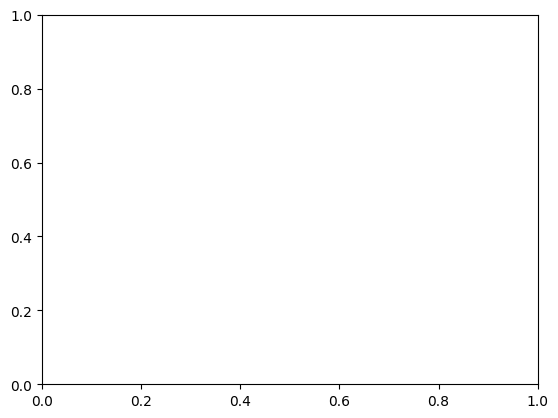

In [2]:
import MNIST_database as mnist

#Choose the final size of your image dataset
size_final = 8

data_zoom = mnist.MNISTData(size_initial=20, size_final=size_final, color_depth=5, flat=True)
test= data_zoom.x_test
train = data_zoom.x_train
ax = plt.subplot(1, 1 , 1)

#plt.imshow(test[0].reshape(size_final,size_final), cmap='gray_r')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)

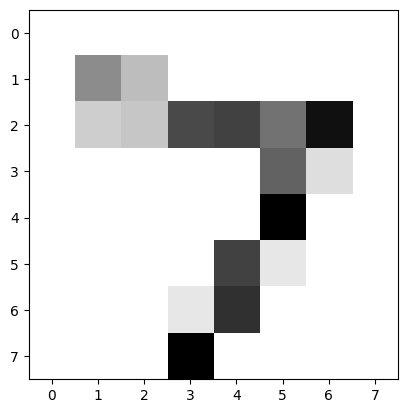

In [3]:
plt.imshow(test[0].reshape(size_final,size_final), cmap='gray_r')


In [4]:
from tensorflow.keras.datasets import mnist as mnist
(_, y_train), (_, y_test) = mnist.load_data()


In [5]:
from fxpmath import Fxp
BIT_WIDTH = 8
is_signed = True

In [6]:
#lista contenente gli indici delle immagini campione nel Test Set del MNIST
#num_list[0] contiene l'indice dell'immagine di uno zero, num_list[1] di un uno e così via
#           0  1  2  3  4  5  6  7  8  9 
num_list = [3, 2, 1, 32,4, 15,21,0, 61,12]
for item in num_list:
    print(f"{str(item).ljust(4, ' ')}: {(Fxp(item, signed=is_signed, n_word=BIT_WIDTH, n_frac=0).bin())}")

3   : 00000011
2   : 00000010
1   : 00000001
32  : 00100000
4   : 00000100
15  : 00001111
21  : 00010101
0   : 00000000
61  : 00111101
12  : 00001100


In [7]:
np.flip(test[0])

array([0.     , 0.     , 0.     , 0.     , 0.96875, 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.78125, 0.09375, 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.09375, 0.71875, 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.96875, 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.125  , 0.59375,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.90625,
       0.53125, 0.71875, 0.6875 , 0.21875, 0.1875 , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.25   , 0.4375 , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     ])

In [8]:

# #---------------------------------------------------------
# #--FORMAT OF INPUT IMAGES FOR NN IN FPGA------------------
# #----------- ap_fixed<6,0> -------------------------------
# #---------------------------------------------------------

# # last pixel              first pixel
# #[0  1  0  0  0  0 | ... | 0  0  0  1  0  0]
# # s  4  3  2  1  0         s  4  3  2  1  0 
# #    2  2  2  2  2            2  2  2  2  2  


# with open('dataset/TESTimg_downto_apfixed6.txt', 'w') as f:
#     for index , num in enumerate(num_list):
#         f.write(str(index)+ ': ')
#         for i, item in enumerate(np.flip(test[num])):
#             #f.write('{:06d}'.format(int((bin(int(i*256/4))[2:]))))
#             # if item == 0.0:
#             #     print(.00000)
#             #     continue
#             print(item)
#             print(Fxp(item, signed=is_signed, n_word=BIT_WIDTH, n_frac=BIT_WIDTH).bin())
#             print('--')
#             # print('{:06d}'.format(float_bin(number=item, places=5)))
#         f.write('\n\n')


## Find numbers from labels



Found 980 0s 
[3, 10, 13, 25, 28, 55, 69, 71, 101, 126, 136, 148, 157, 183, 188, 192, 194, 215, 246, 269, 271, 294, 296, 297, 305]


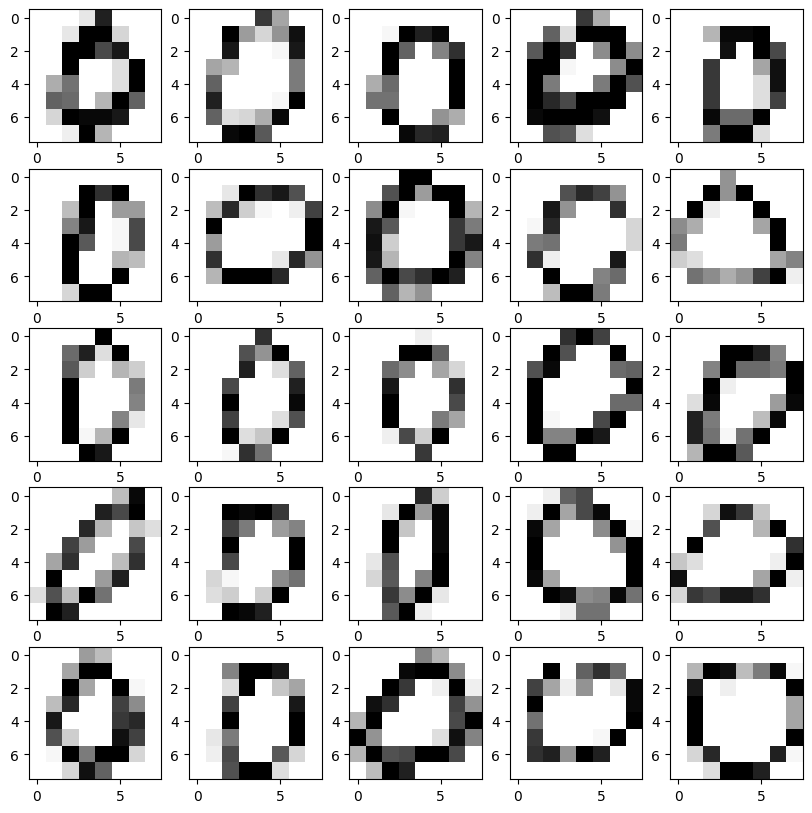

In [9]:
target_num = 0

indices = [i for i in range(len(test)) if y_test[i] == target_num]
print('Found', len(indices), str(target_num) + 's ')
print(indices[0:25])

fig = plt.figure(figsize=(10, 10))
j = 1
for i in indices[0:25]: 
    fig.add_subplot(5, 5, j)
    plt.imshow(test[i].reshape(size_final,size_final), cmap='gray_r')
    j+=1


## Generating file.txt with binary images from 0 to 10

[0.      0.      0.      0.09375 0.84375 0.      0.      0.      0.
 0.      0.09375 0.96875 0.96875 0.15625 0.      0.      0.      0.
 0.96875 0.96875 0.6875  0.875   0.      0.      0.      0.      0.96875
 0.      0.      0.125   0.96875 0.      0.      0.3125  0.53125 0.
 0.      0.125   0.96875 0.      0.      0.59375 0.5625  0.      0.28125
 0.96875 0.59375 0.      0.      0.15625 0.96875 0.9375  0.9375  0.875
 0.      0.      0.      0.      0.0625  0.96875 0.28125 0.      0.
 0.     ]


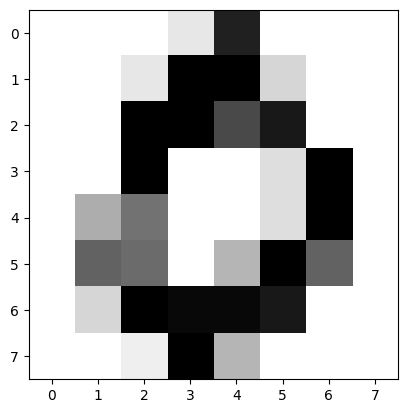

In [10]:
img = test[3]
print(img)
plt.imshow(img.reshape(size_final,size_final), cmap='gray_r')


In [27]:
dir = os.path.join("dataset")
if not os.path.exists(dir):
    os.mkdir(dir)

for target_num in range(0,10):
    indices = [i for i in range(len(test)) if y_test[i] == target_num]
    with open('dataset/TESTimg_' + str(target_num) + '_ap6.txt', 'w') as f:
    #for num in enumerate(indices[0:100]):
        for i in test[0:100]:
            for j in i:

            #f.write('{:04x}'.format((int(i*65536))))
                f.write(str(j))
                f.write('\t')
                # print(j)
            #print(i*65536, '\n')
            f.write('\n')


In [12]:
# indices

In [26]:
# for i, item in enumerate(test[4]):
#     print(item)


In [25]:
# indices[0:100]

In [24]:
# for j, num in enumerate(indices[0:100]):
#     print(j,num)

In [23]:
dir = os.path.join("dataset")
if not os.path.exists(dir):
    os.mkdir(dir)

for target_num in range(0,10):
    indices = [i for i in range(len(test)) if y_test[i] == target_num]
    with open('dataset/TESTimg_' + str(target_num) + '_ap6.txt', 'w') as f:
        for j, num in enumerate(indices[0:100]):
            print(f"num: {num}, test[num]: {test[num]}")
            for item in test[num]:
                print(f"item: {item}")
            #for j in i:

            #f.write('{:04x}'.format((int(i*65536))))
                f.write('{:06d}'.format((int(item))))
                f.write('\t')
                print('{:06d}'.format((int(item))))
                #print(i*65536, '\n')
            f.write('\n')


num: 3, test[num]: [0.      0.      0.      0.09375 0.84375 0.      0.      0.      0.
 0.      0.09375 0.96875 0.96875 0.15625 0.      0.      0.      0.
 0.96875 0.96875 0.6875  0.875   0.      0.      0.      0.      0.96875
 0.      0.      0.125   0.96875 0.      0.      0.3125  0.53125 0.
 0.      0.125   0.96875 0.      0.      0.59375 0.5625  0.      0.28125
 0.96875 0.59375 0.      0.      0.15625 0.96875 0.9375  0.9375  0.875
 0.      0.      0.      0.      0.0625  0.96875 0.28125 0.      0.
 0.     ]
item: 0.0
000000
item: 0.0
000000
item: 0.0
000000
item: 0.09375
000000
item: 0.84375
000000
item: 0.0
000000
item: 0.0
000000
item: 0.0
000000
item: 0.0
000000
item: 0.0
000000
item: 0.09375
000000
item: 0.96875
000000
item: 0.96875
000000
item: 0.15625
000000
item: 0.0
000000
item: 0.0
000000
item: 0.0
000000
item: 0.0
000000
item: 0.96875
000000
item: 0.96875
000000
item: 0.6875
000000
item: 0.875
000000
item: 0.0
000000
item: 0.0
000000
item: 0.0
000000
item: 0.0
000000
ite

In [28]:
# dir = os.path.join("dataset")
# if not os.path.exists(dir):
#     os.mkdir(dir)

# for target_num in range(0,10):
#     indices = [i for i in range(len(test)) if y_test[i] == target_num]
#     with open('dataset/TESTimg_' + str(target_num) + '_ap6.txt', 'w') as f:
#         for j, num in enumerate(indices[0:100]):
#             for i, item in enumerate(test[j]):
#             #for j in i:

#             #f.write('{:04x}'.format((int(i*65536))))
#                 f.write('{:06d}'.format((int(item))))
#                 f.write('\t')
#                 print('{:06d}'.format((int(item))))
#                 #print(i*65536, '\n')
#             f.write('\n')


In [ ]:
#lista contenente gli indici delle immagini campione nel Test Set del MNIST
#num_list[0] contiene l'indice dell'immagine di uno zero, num_list[1] di un uno e così via

n_image_test = 100

#           0  1  2  3  4  5  6  7  8  9          
num_list = [3, 2, 1, 32,4, 15,21,0, 61,12] + [x for x in range(62,62 + n_image_test - 10)]

#num_list = [3]
with open('dataset/TESTimg_downto_apfixed6_100.txt', 'w') as f:
    for index , num in enumerate(num_list):
        #f.write('signal address_' + str(index) + ' : std_logic_vector((size-1) downto 0) := \n')
        for i in np.flip(test[num]):
            #f.write('{:016b}'.format(int((bin(int(i*256))[2:]))))
            f.write('{:016b}'.format((int(i*256))))
            print('{:016b}'.format((int(i*256))))
            print(i*256)
        f.write('\n')

#salvataggio dei true label associati alle immagini inserite nella FPGA
with open('dataset/TESTlabels_downto_apint6_100imgs.txt', 'w') as f:
    for index , num in enumerate(num_list):
        f.write('signal label_' + str(index) + ' : std_logic_vector(3 downto 0) :=  ')
        f.write('{:04d}'.format(int((bin(y_test_int[num])[2:]))))
        f.write('\n')

0000000000000000
0.0
0000000000000000
0.0
0000000000000000
0.0
0000000001001000
72.0
0000000011111000
248.0
0000000000010000
16.0
0000000000000000
0.0
0000000000000000
0.0
0000000000000000
0.0
0000000000000000
0.0
0000000011100000
224.0
0000000011110000
240.0
0000000011110000
240.0
0000000011111000
248.0
0000000000101000
40.0
0000000000000000
0.0
0000000000000000
0.0
0000000010011000
152.0
0000000011111000
248.0
0000000001001000
72.0
0000000000000000
0.0
0000000010010000
144.0
0000000010011000
152.0
0000000000000000
0.0
0000000000000000
0.0
0000000011111000
248.0
0000000000100000
32.0
0000000000000000
0.0
0000000000000000
0.0
0000000010001000
136.0
0000000001010000
80.0
0000000000000000
0.0
0000000000000000
0.0
0000000011111000
248.0
0000000000100000
32.0
0000000000000000
0.0
0000000000000000
0.0
0000000011111000
248.0
0000000000000000
0.0
0000000000000000
0.0
0000000000000000
0.0
0000000000000000
0.0
0000000011100000
224.0
0000000010110000
176.0
0000000011111000
248.0
0000000011111000